In [1]:
import pickle
import numpy as np

results_file = '../results/pendulum/long/discrete_vae/batch_64_context_4/results/results_cp_1000.pkl'

f = open(results_file, 'rb')
d = pickle.load(f)

print(d.keys())

dict_keys(['true_traj_state', 'pred_goal', 'pred_context', 'pred_traj_state', 'true_goal', 'true_traj_action', 'pred_traj_action', 'pred_traj_goal'])


In [2]:
def softmax(x):
    if len(x.shape) == 2:
        new_x = x - np.max(x,axis=1)[:, np.newaxis]
        denom = np.sum(np.exp(new_x), axis = 1)[:, np.newaxis]
        return np.exp(new_x)/denom
    elif len(x.shape) == 1:
        new_x = x - np.max(x)
        denom = np.sum(np.exp(new_x))
        return np.exp(new_x) / denom
    else:
        raise ValueError("incorrect softmax input")

N = len(d['pred_traj_state'])
list_of_theta = []
list_of_thetadot = []
list_of_context = []
list_of_actions = []

context_colors = ['g', 'b', 'r', 'm', 'y', 'c', 'k', 'w']
#markers = ['.', 'v', 'o', 's']

for i in range(N):
    for state, action, context in zip(d['pred_traj_state'][i], d['pred_traj_action'][i], d['pred_context'][i]):
        # get context
        context_label = np.argmax(softmax(context)[0, :], axis=0)
        context_color = context_colors[context_label]
        
        #if context_color == 'g':
        list_of_context.append(context_color)
        # get theta
        sintheta = state[0]
        costheta = state[1]
        theta = np.arctan2(sintheta, costheta)
        # get thetadot
        thetadot = state[2]
        # append to lists
        list_of_theta.append(theta)
        list_of_thetadot.append(thetadot)
        
        # get action
        list_of_actions.append(action[0])

array_of_theta = np.array(list_of_theta)
array_of_thetadot = np.array(list_of_thetadot)
array_of_context = np.array(list_of_context)
array_of_actions = np.array(list_of_actions)


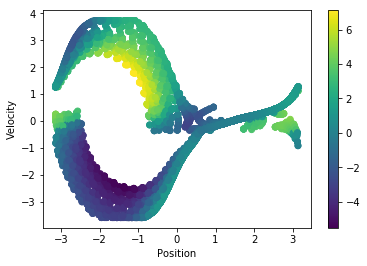

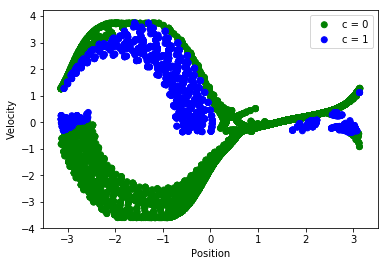

Done


In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

#for x, y, c in zip(list_of_theta, list_of_thetadot, list_of_context):
#for m in markers:
#    mask = (array_of_context == m)
plt.scatter(array_of_theta, array_of_thetadot, c=array_of_actions)
    
plt.xlabel('Position')
plt.ylabel('Velocity')

plt.colorbar()
plt.show()

count = 0
for color in context_colors:
    mask = (array_of_context == color)
    if np.logical_not(mask).all():
        continue
    label = str(count)
    plt.scatter(array_of_theta[mask], array_of_thetadot[mask], c=array_of_context[mask], label='c = ' + label)
    count += 1
    
plt.xlabel('Position')
plt.ylabel('Velocity')

plt.legend()
plt.show()
print('Done')